In [45]:
"""
Parametrized Circuits: https://youtu.be/adeYx7bwYrA
https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-93.php
"""

'\nParametrized Circuits: https://youtu.be/adeYx7bwYrA\nhttps://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-93.php\n'

In [46]:
import numpy as np
from qiskit.circuit import ParameterVector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_statevector, Statevector
import random
import matplotlib.pyplot as plt

In [47]:
q = 4
qr = QuantumRegister(q, 'q')
def circuit_creator(base_circuit=None):
    qc = QuantumCircuit(qr)
    theta_i = [random.random() for _ in range(q)]
    theta_i = iter(theta_i) 
    # ODD blocks
    qc.rx(next(theta_i),0)
    qc.rx(next(theta_i),1)
    qc.rx(next(theta_i),2)
    qc.rx(next(theta_i),3)
    # Even Blocks
    theta_j = [random.random() for _ in range(q)]
    theta_j = iter(theta_j) 
    qc.rx(next(theta_j),0)
    qc.rx(next(theta_j),1)
    qc.rx(next(theta_j),2)
    qc.rx(next(theta_j),3)
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    if base_circuit is None:
        return qc
    return qc.combine(base_circuit)

In [48]:
L = 100
phi =  random_statevector(dims=(2, 2, 2, 2))
psi = Statevector.from_label('0000')
transpiled_qc = circuit_creator()
x_axis = y_axis = []
for i in range(L):
    ret = psi.evolve(transpiled_qc)
    min = np.linalg.norm(psi.data-ret.data)**2
    x_axis.append(i)
    y_axis.append(min)
    transpiled_qc = circuit_creator(transpiled_qc)

────────────────»
«            │        │  │ └─────────────┘└─────────────┘┌──────────────┐»
«q_1: ───────■────────┼──┼────────■──────────────■───────┤ RX(0.098948) ├»
«     ┌─────────────┐ │  │        │              │       └──────────────┘»
«q_2: ┤ RX(0.45816) ├─■──┼────────■──────────────┼──────────────■────────»
«     ├─────────────┤    │                       │              │        »
«q_3: ┤ RX(0.16367) ├────■───────────────────────■──────────────■────────»
«     └─────────────┘                                                    »
«                                          ┌─────────────┐┌─────────────┐»
«q_0: ───────────────────────■────────■──■─┤ RX(0.56897) ├┤ RX(0.51696) ├»
«     ┌──────────────┐       │        │  │ └─────────────┘└─────────────┘»
«q_1: ┤ RX(0.012682) ├───────■────────┼──┼────────■──────────────■───────»
«     ├─────────────┬┘ ┌────────────┐ │  │        │              │       »
«q_2: ┤ RX(0.27041) ├──┤ RX(0.4731) ├─■──┼────────■──────────────┼───────»
«     ├─────────────┤ ┌┴────────────┤    │                       │       »
«q_3: ┤ RX(0.71417) ├─┤ RX(0.58274) ├────■───────────────────────■───────»
«     └─────────────┘ └─────────────┘                                    »
«                                                           ┌─────────────┐»
«q_0: ────────────────────────────────────────■────────■──■─┤ RX(0.97828) ├»
«     ┌─────────────┐ ┌─────────────┐         │        │  │ └─────────────┘»
«q_1: ┤ RX(0.43906) ├─┤ RX(0.58829) ├─────────■────────┼──┼────────■───────»
«     └─────────────┘ ├─────────────┤  ┌─────────────┐ │  │        │       »
«q_2: ───────■────────┤ RX(0.35164) ├──┤ RX(0.38878) ├─■──┼────────■───────»
«            │       ┌┴─────────────┴─┐├─────────────┤    │                »
«q_3: ───────■───────┤ RX(0.00041245) ├┤ RX(0.77966) ├────■────────────────»
«                    └────────────────┘└─────────────┘                     »
«     ┌─────────────┐                                                   »
«q_0: ┤ RX(0.61723) ├────────────────────────────────────■─────────■──■─»
«     └─────────────┘┌────────────┐┌─────────────┐       │         │  │ »
«q_1: ───────■───────┤ RX(0.0106) ├┤ RX(0.81735) ├───────■─────────┼──┼─»
«            │       └────────────┘├─────────────┤┌─────────────┐  │  │ »
«q_2: ───────┼─────────────■───────┤ RX(0.31471) ├┤ RX(0.38555) ├──■──┼─»
«            │             │       ├─────────────┤├─────────────┴┐    │ »
«q_3: ───────■─────────────■───────┤ RX(0.14293) ├┤ RX(0.093102) ├────■─»
«                                  └─────────────┘└──────────────┘      »
«     ┌─────────────┐┌─────────────┐                              »
«q_0: ┤ RX(0.27488) ├┤ RX(0.87931) ├──────────────────────────────»
«     └─────────────┘└─────────────┘┌─────────────┐┌─────────────┐»
«q_1: ───────■──────────────■───────┤ RX(0.44842) ├┤ RX(0.16553) ├»
«            │              │       └─────────────┘└┬────────────┤»
«q_2: ───────■──────────────┼──────────────■────────┤ RX(0.8821) ├»
«                           │              │       ┌┴────────────┤»
«q_3: ──────────────────────■──────────────■───────┤ RX(0.21891) ├»
«                                                  └─────────────┘»
«                           ┌──────────────┐┌─────────────┐               »
«q_0: ───────■─────────■──■─┤ RX(0.090826) ├┤ RX(0.44825) ├───────────────»
«            │         │  │ └──────────────┘└─────────────┘┌─────────────┐»
«q_1: ───────■─────────┼──┼────────■───────────────■───────┤ RX(0.45835) ├»
«     ┌─────────────┐  │  │        │               │       └─────────────┘»
«q_2: ┤ RX(0.26537) ├──■──┼────────■───────────────┼──────────────■───────»
«     ├─────────────┴┐    │                        │              │       »
«q_3: ┤ RX(0.055248) ├────■────────────────────────■──────────────■───────»
«     └──────────────┘                                                    »
«                                          ┌──────────────┐┌──────────────┐»
«q_0: ──────────────────────■─────────■──■─┤ RX(0.

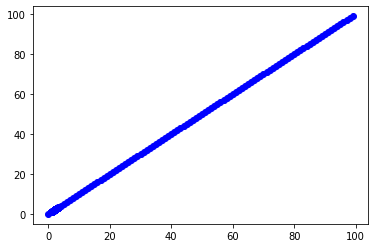

In [49]:
plt.plot(x_axis ,y_axis, )